# Laboratorio 4 - Regresiones
Marco Fuentes - 18188

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
!{sys.executable} -m pip install seaborn
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
#!{sys.executable} -m pip install sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [2]:
dataframe = pd.read_csv('insurance.csv')

In [3]:
dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [4]:
dataframe.describe()

,age,sex,bmi,children,smoker,region,charges
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,39.591954,0.508621,30.676552,1.091954,0.232759,1.497126,14016.426293
std,14.417015,0.500646,5.625850,1.192021,0.423198,1.104089,12638.887852
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1137.011000
25%,27.000000,0.000000,26.782500,0.000000,0.000000,1.000000,4888.466125
50%,40.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9719.305250
75%,53.000000,1.000000,34.777500,2.000000,0.000000,2.000000,19006.316150
max,64.000000,1.000000,49.060000,5.000000,1.000000,3.000000,51194.559140


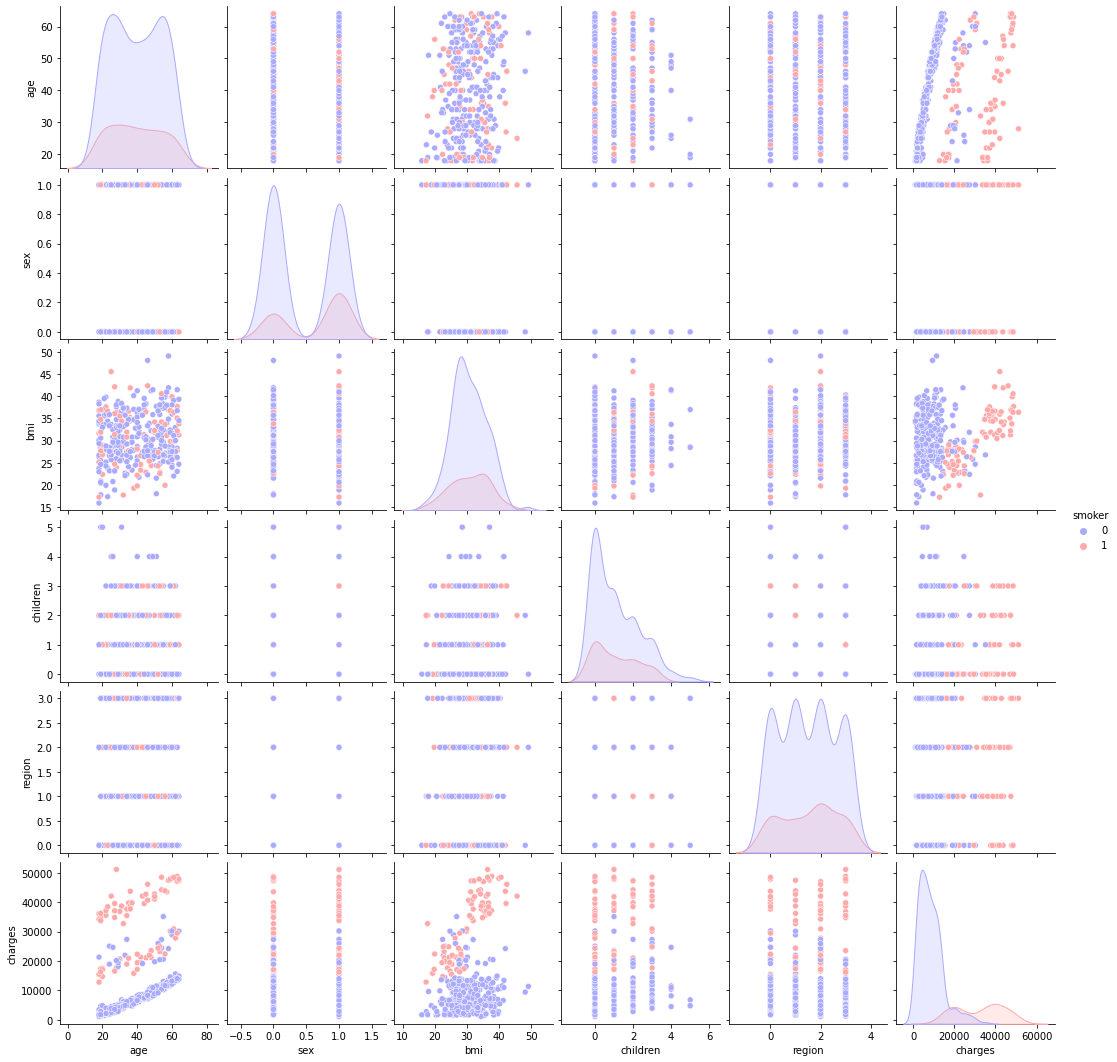

In [5]:
sns.pairplot(data=dataframe, hue="smoker", palette="bwr")

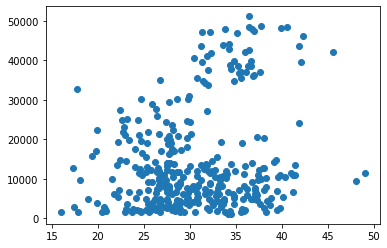

In [6]:
x = dataframe['bmi']
y = dataframe['charges']
plt.scatter(x, y)
plt.show()

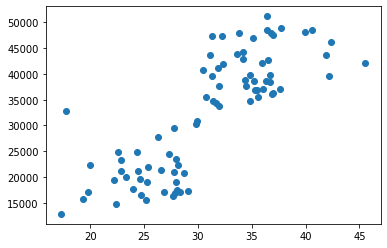

In [7]:
# Si solo consideramos a los fumadores, aparece un patron mas evidente.
x = dataframe[dataframe['smoker']==1]['bmi']
y = dataframe[dataframe['smoker']==1]['charges']
plt.scatter(x, y)
plt.show()

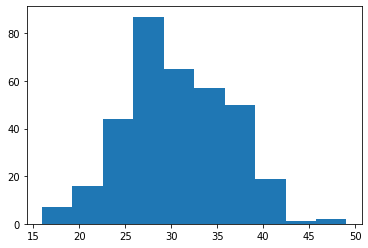

In [8]:
plt.hist(dataframe['bmi'])
plt.show()

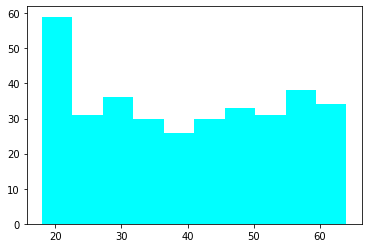

In [9]:
plt.hist(dataframe['age'], color='cyan')
plt.show()

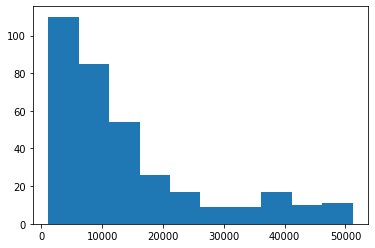

In [10]:
plt.hist(dataframe['charges'])
plt.show()

In [11]:
# Para ver si hay algo que no cuadre
dataframe.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [12]:
labelEncoder = LabelEncoder()
sex_types = ('Male', 'Female')
sex_df = pd.DataFrame(sex_types, columns=['sex_category'])
dataframe['sex_category'] = labelEncoder.fit_transform(dataframe['sex'])
dataframe.head()

,age,sex,bmi,children,smoker,region,charges,sex_category
0,19,0,27.900,0,1,3,16884.92400,0
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,1
3,33,1,22.705,0,0,1,21984.47061,1
4,32,1,28.880,0,0,1,3866.85520,1


In [13]:
dataframe.describe()

,age,sex,bmi,children,smoker,region,charges,sex_category
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,39.591954,0.508621,30.676552,1.091954,0.232759,1.497126,14016.426293,0.508621
std,14.417015,0.500646,5.625850,1.192021,0.423198,1.104089,12638.887852,0.500646
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1137.011000,0.000000
25%,27.000000,0.000000,26.782500,0.000000,0.000000,1.000000,4888.466125,0.000000
50%,40.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9719.305250,1.000000
75%,53.000000,1.000000,34.777500,2.000000,0.000000,2.000000,19006.316150,1.000000
max,64.000000,1.000000,49.060000,5.000000,1.000000,3.000000,51194.559140,1.000000


In [14]:
target = dataframe['charges']
dataframe = dataframe.drop(columns=['charges'])
dataframe = dataframe[['bmi']]
X_train, X_test, y_train, y_test = train_test_split(dataframe, target, test_size = 0.33)

In [15]:
scaler = StandardScaler()
scaler.fit(dataframe)

StandardScaler()

In [16]:
X_train.mean()

bmi    30.890708
dtype: float64

In [17]:
# Promedio de inputs y outputs
x_mean = np.mean(X_train['bmi'].values)
y_mean = np.mean(y_train.values)
# Numero total de datos
n = len(X_train)
# using the formula to calculate the b1 and b0
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X_train['bmi'].values[i] - x_mean) * (y_train.values[i] - y_mean)
    denominator += (X_train['bmi'].values[i] - x_mean) ** 2
    
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)

print(b0, b1)

0.24094185077956354 462.03427772129885


In [18]:
rmse = 0
for i in range(n):
    y=  b0 + b1* X_train.values[i]
    rmse += (y_train.values[i] - y) ** 2
    
rmse = np.sqrt(rmse/n)
print(rmse)

[12488.82366273]


In [19]:
sumofsquares = 0
sumofresiduals = 0
for i in range(n) :
    y_pred = b0 + b1 * X_train.values[i]
    sumofsquares += (y_train.values[i] - y_mean) ** 2
    sumofresiduals += (y_train.values[i] - y_pred) **2
    
score  = 1 - (sumofresiduals/sumofsquares)
print(score)

[0.04118468]


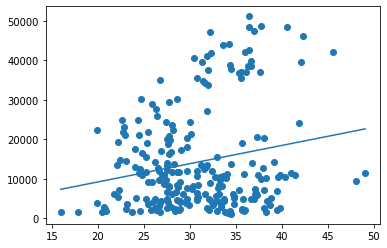

In [20]:
plt.scatter(X_train['bmi'].values, y_train)
x_max = np.max(X_train) 
x_min = np.min(X_train) 
x = np.linspace(x_min, x_max)
y = b0 + b1 * x
plt.plot(x,y)
plt.show()

# Con libreria

In [21]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [22]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [23]:
reg.coef_

array([462.03427772])

In [24]:
mean_absolute_error(reg.predict(X_test), y_test)

9494.161783008336

In [25]:
mean_squared_error(reg.predict(X_test), y_test)

144810072.43926558

In [26]:
r2_score(reg.predict(X_test), y_test)

-20.4428538154267

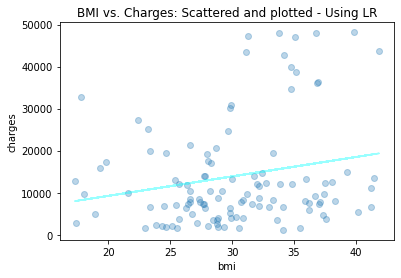

COEF:  [462.03427772]


In [27]:
plt.scatter(X_test['bmi'], y_test, alpha=0.3)
plt.plot(X_test, reg.predict(X_test), color='cyan', alpha=0.4)
plt.title('BMI vs. Charges: Scattered and plotted - Using LR')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()
print('COEF: ', reg.coef_)

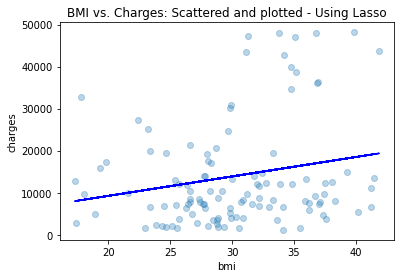

COEF:  [462.03109129]


In [28]:
plt.scatter(X_test['bmi'], y_test, alpha=0.3)
plt.plot(X_test, lasso.predict(X_test), color='b')
plt.title('BMI vs. Charges: Scattered and plotted - Using Lasso')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()
print('COEF: ', lasso.coef_)

# Regresión Polinomial

In [29]:
dataframe = pd.read_csv('insurance.csv')

In [30]:
#dataframe = dataframe[dataframe['smoker']==0][dataframe['charges']<15000]
target = dataframe['charges']
dataframe = dataframe.drop(columns=['charges'])
dataframe = dataframe[['bmi']]
X_train, X_test, y_train, y_test = train_test_split(dataframe, target, test_size = 0.33)

In [31]:
poly = PolynomialFeatures()
poly_train = poly.fit_transform(X_train)
poly_test = poly.fit_transform(X_test)
pl = LinearRegression()
pl.fit(poly_train, y_train)
print(mean_squared_error(pl.predict(poly_train), y_train))
print(r2_score(pl.predict(poly_train), y_train))
print(mean_squared_error(pl.predict(poly_test), y_test))
print(r2_score(pl.predict(poly_test), y_test))

152814983.67367488
-15.736046225875345
151458258.9086888
-16.548075054910313


115


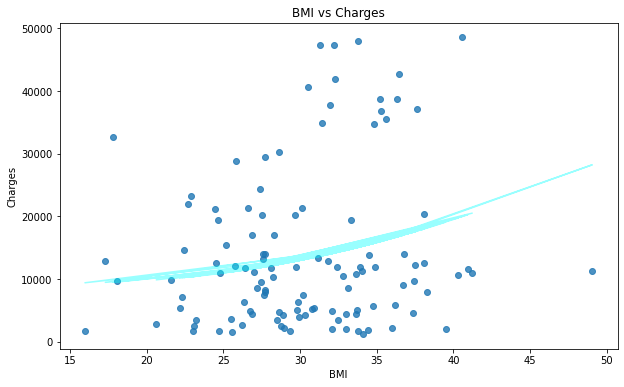

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, alpha=0.8)

plt.plot(X_test, pl.predict(poly_test), color='cyan', alpha = 0.4)
print(len(pl.predict(poly_test)))
pl.predict(poly_test)
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()